In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
current_dir = os.getcwd()
src_path = os.path.join(current_dir, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)

import viz
import grid
import cell
import FVM

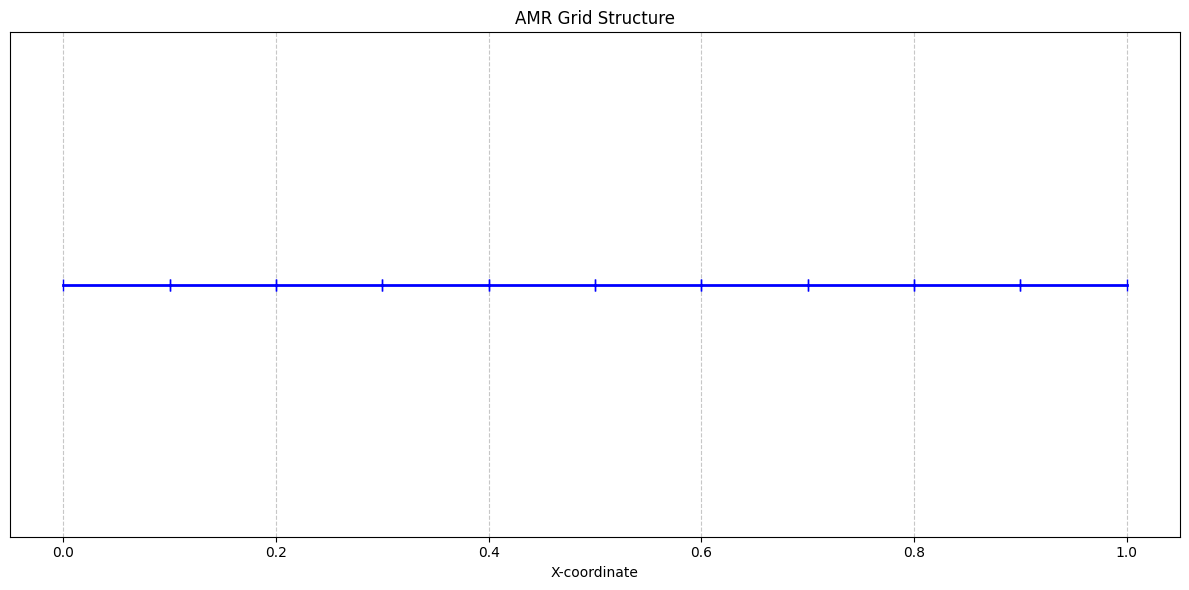

In [4]:
grid0 = grid.grid(1, 10)
viz.plot_amr_grid(grid0)

In [5]:
def init_grid(grid):
    """
    Initializes the primitive variables of the grid cells for the Sod Shock Tube problem.
    This function directly sets primitive values on cells.
    """
    active_cells = grid.get_all_active_cells()

    if not active_cells:
        print("No active cells found to initialize.")
        return

    cell_x_coords = np.array([cell.x for cell in active_cells])

    state_left = np.array([1.0, 0.0, 1.0])    # [density, velocity, pressure]
    state_right = np.array([0.125, 0.0, 0.1]) # [density, velocity, pressure]

    # Iterate through active cells and set their primitive variables directly
    for i, cell in enumerate(active_cells):
        if cell_x_coords[i] < 0.5:
            cell.prim = list(state_left)
        else:
            cell.prim = list(state_right)

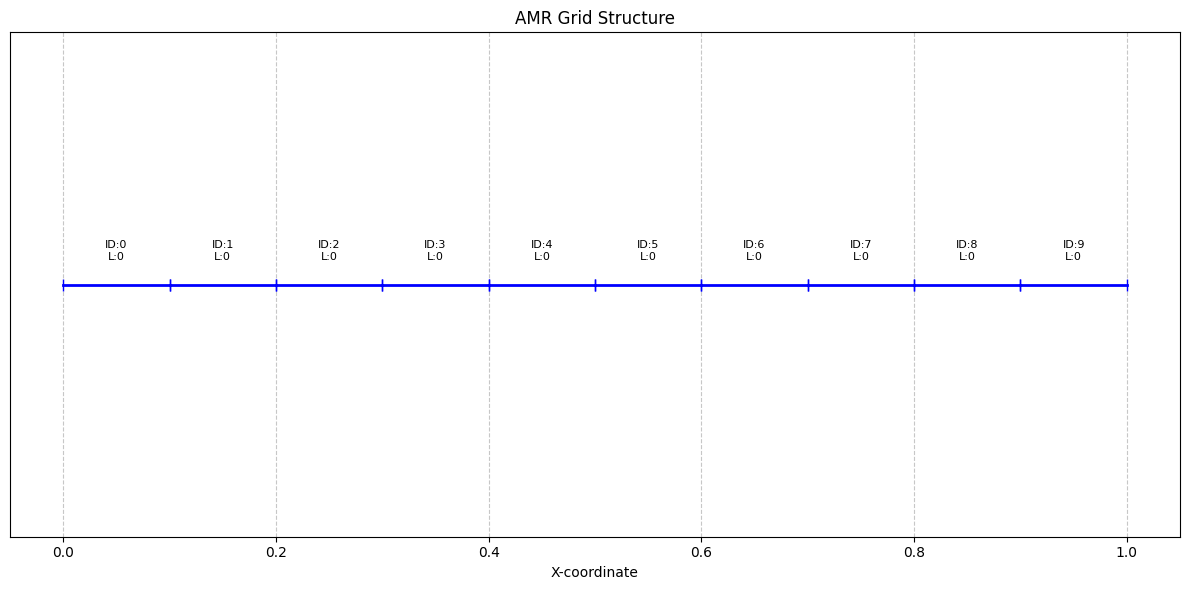

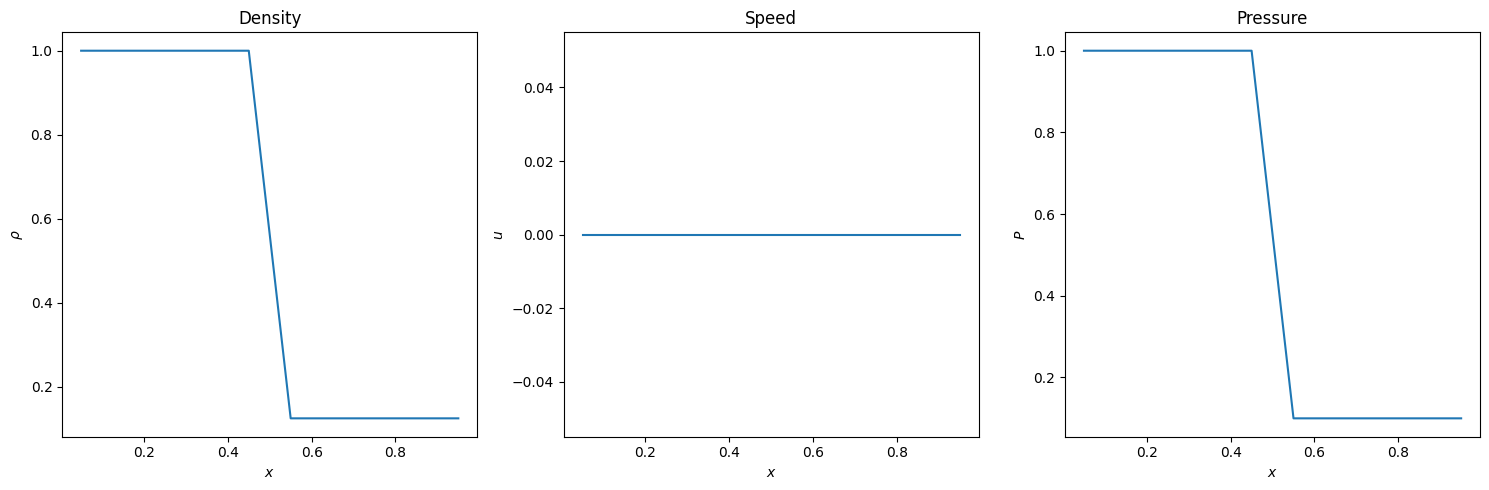

In [6]:
grid0 = grid.grid(1, 10)
init_grid(grid0)

viz.plot_amr_grid(grid0, label=True)
viz.plot_amr_value(grid0)

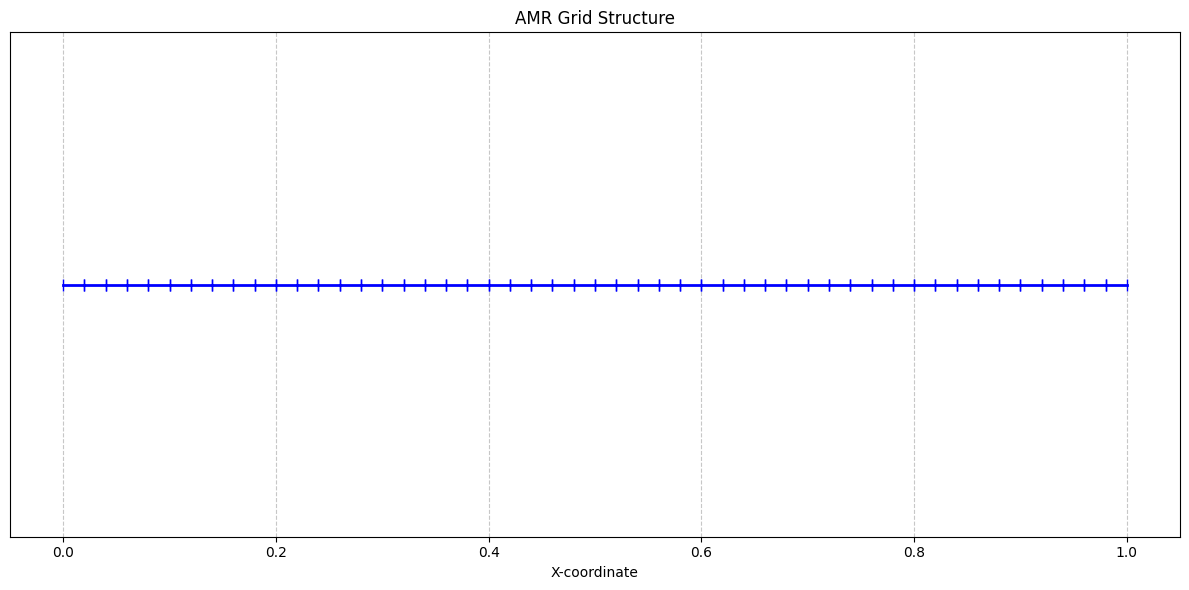

Timestep: 0 s
0 True
0 True
0 True
0 True
Timestep: 0.00845154254728515 s
1 True
1 True
1 True
1 True
1 True
1 True
1 True
1 True
Timestep: 0.011453059977344634 s
2 True
2 True
2 True
2 True
2 True
2 True
2 True
2 True
2 True
2 True
2 True
2 True
2 True
2 True
2 True
2 True
Timestep: 0.01288210505197312 s
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
Timestep: 0.013586905584839621 s
4 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
4 False
Timestep: 0.014115126994044932 s
5 False
4 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 False
3 F

KeyboardInterrupt: 

In [ ]:
grid1 = grid.grid(L=1, N=50)
viz.plot_amr_grid(grid1)
init_grid(grid1)
FVM.solve(FVM.HLL_flux, grid1, t_final=0.014)
viz.plot_amr_grid(grid1)
viz.plot_amr_value(grid1)
#viz.animate(grid1_history, 'plot/test.gif')

In [ ]:
viz.plot_amr_grid(grid1)